## Machine Learning and Statistics Module 52954
## Tasks
### Lecturer: Ian McLaughlin
### Student : Fiona O'Riordan
***

## Task 1
***

## Objective: 

October 5th, 2020: Write a Python function called sqrt2 that calculates and prints to the screen the square root of 2 to 100 decimal places. Your code should not depend on any module from the standard library1 or otherwise. You should research the task first and include references and a description of your algorithm.

## Background

### Methods for calculating square roots are approximations.

Methods for calculating square roots seek to identify the non negative square root of a number (commonly denoted as √S, 2√S, or S1/2 ) of a real number [1]. Real numbers are any positive or negative number including all integers (whole positive or negative numbers or 0), rational(can be expressed as a fraction) and irrational numbers (can be expressed as an infinite decimal representation e.g. 3.1415926535....).  Real numbers which include decimal points are called floating point numbers, since the decimal "floats" between the digits [2].  Irrational numbers with infinite decimal representation are generally estimated by computers [2]. For most numbers their square root is an irrational number [1] Moreover, even in the case of computing the square root of a perfect square integer where a square root with an exact finite represenation exists, only a series of increasingly accurate approximations are returned. [1].


### Newtons Method.

Typically analytical methods to calcuate square roots tend to be iterative and have two steps. Firstly an initial guess $s$ of the square root is provided. This number can be any number as long as it is less that the number $x$ where √X is the number sought. Secondly, each iteration produces a better guess or is closer in refinement to the √X until a required accuracy is met or when a maximum number of iteratiions (predefined) have been reached for slowly converging algorithms. The closer this initial guess is to the √S then the less iterations will performed[1],[4].  

Newton's method is one such approach and will be used for this task as it the most widely used approach and the most suitable to computational [1],[4]. Newtowns method can be implemented to calculate the square root $s$ of a number $x$, where $x \gt 0$ and $s = \sqrt x $. Starting with an initial guess for the square root, $s_0$, the algorithm calculates a better guess using the formula
$$ s_{n+1} = s_n - \left ( \frac{s_n^2 - x}{2 s_n} \right ). $$
$s_{n}$ is the previous estimate for the square root and $s_{n+1}$ is the revised/updated appromiation.

Therefore, We can calculate the square root of a number using Newton's method [3, 4]. To find the square root $s$ of a number $x$, we can iterate using the following equation.
$$ s_{n+1} = s - \frac{s^2 - x}{2s} $$

 

## Implement the function.


In [ ]:
"""
A function to calculate the square root of a number.
"""
def sqrt(x):
   
    # define precision as number of decimal places to be used.
    precision = 10**-10;
    # Set the initial guess for the square root of s.
    s = x // 2
    # iteration number
    i = 1
    # Loop while the absolute difference between x and (s^2) is greater than the precision /accuracy required.
    while abs(x - (s **2)) > precision:
        # Calculate the next better guess for the square root.
        # first lets calculate the difference between current guess and next guess so that we can view.
        diff = (s*s - x) / (2 * s)
        s -= diff
        print("Loop:",i, "approximation",s, "difference from pervious value", diff)
        i += 1
    # Return the square root of x (approximation).
    return s


### Test the function


In [ ]:
myans = sqrt(2)
print("Square root of 2: ", myans)
num1 = sum(c.isdigit() for c in (str(myans)))
print("Number of decimal returned using Newton's square number is", sum(c.isdigit() for c in (str(myans))))

### Evalute the result

The functiona sqrt(2) only returns a value with only 17 significant digits displayed. As the Python documentation [6] explains and as we explored the earlier section above 'Methods for calculating square roots are approximations' computer languages use an approximation of certain numbers. In the case of Python that approximatiion is displayed to 17 significant decimal places [6].

According to Python documentation [6], floating point numbers are represented in base 2 (binary) fractions. Therefore for example 0.125 is represented as follows in decimal (base 10): 
0.125 = 1/10 + 2/100 + 5/1000
Similary the binary fraction 0.001 is represented as : 
0.001 = 0/2 + 0/4 + 1/8.

But mostly decimal fractions cannot be exactly expressed as a binary fraction. Therefore decimal floating-point numbers are **approximated** by the binary floating-point numbers actually stored by the computer[6]. 

Python documentation gives the example of 1/10 and explains how the decimal value 0.1 can never be represented exactly as a base 2 fraction regardless of the base 2 digits you use. The value 1/10 in base 2 is an infinitely repeating fraction: 
0.0001100110011001100110011001100110011001100110011...

While 1/10 will by default be displayed as 0.1, the actual stored value of 1/10 is the nearest representable binary fraction of that fraction.  If we format 0.1 to 100 places we see that number of signficant places calculated to in the approximation is 55.

In [ ]:
print(0.1) 
# print 0.1 and format to 100 decimal places
len(format((0.1), ".100f"))
mystring = "1000000000000000055511151231257827021181583404541015625"
len(mystring)

Python documentation [6] explains that floats are typically approximated using a binary fraction with the numerator using the first 53 bits starting with the most significant bit and with the denominator as a power of two. The binary fraction is 3602879701896397 / 2 ** 55

In [ ]:
3602879701896397 / 2 ** 55

So with this insight in mind, lets try to see if we can view the square root to 2 to 100 places. 

In [ ]:
# Print the result to 100 signification places.
print(format(myans, '.100f'))
 

In [ ]:
import re
num2 = len(re.sub("[^1-9]", "", (format(myans, '.100f'))))
#adding back in the one zero I shouldnt have removed but did for convenience.
print("Number of significant digits in my answer:", num2+1)

We see that 53 significant digits now as expected but this does not solve our question we were asked.


## Modify the approach.


However, if we use the python library 'decimal' and use its function 'sqrt' to calculate the square root of 2 with precision set to 100 we can see that python can be used to calculate the square root of 2 to 100 places. Therefore, it is possible to write a Python function called sqrt2 that calculates and prints to the screen the square root of 2 to 100 decimal places. 


In [ ]:
# https://docs.python.org/2/library/decimal.html [7]
from decimal import *
# set precision equal to 101 as precision refers to significant number of digits and not decimal places.
getcontext().prec = 101 
sqrt2byDecimal = Decimal(2).sqrt()
print(sqrt2byDecimal)
a = sqrt2byDecimal
print(type(a))

# https://stackoverflow.com/questions/24878174/how-to-count-digits-letters-spaces-for-a-string-in-python [8]
import re
numofdigits = len(re.sub("[^0-9]", "", str(sqrt2byDecimal)))
print("Number of signficant digits is ", numofdigits)


So the square root of 2 with 100 decimal places can be achieved using python. Stackoverflow [10] suggests just "multiply your number by 10**200 and use Newton's method to get the integer square root. Then insert a decimal point in the right place". In otherwords, this would return a number which is 100 decimal places from the square root of 2 and could be printed using the string format. 

In [ ]:

"""
A function to calculate the square root of 2.
"""
def sqrt2():
    x = 2*10**200
    # define precision as number of decimal places to be used.
    # precision = 10**-10;  No precision now as difference will be zero.
    # Set the initial guess for the square root of s.
    s = x // 2
    # iteration number
    i = 1
    # Loop while the absolute difference between x and (s^2) is greater than the precision /accuracy required.
    while (x - (s **2)) <0:
        # Calculate the next better guess for the square root.
        # first lets calculate the difference between current guess and next guess so that we can view.

#         s = s- (s*s - x) / (2 * s)
        #simplify in order to avoid overflow error.       
        s = (s+x//s)//2
    # Return the square root of 2 * 10**200
    s = (str(s))
    return(s[0] + "." + s[1:])
    
sqrt2()


This Python function called sqrt2 calculates and prints to the screen the square root of 2 to 100 decimal places.  Finally I am going to benchmark the result.





## Benchmark the Result


Compare to Nassa [9]: 

In [ ]:
# https://apod.nasa.gov/htmltest/gifcity/sqrt2.1mil [10]
sqrt2byNasa = "1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727"
# check I have 100 decimal places places/ 101 significant places.
import re
# verify 100 decimal places
print("number of significant digits",len(str(sqrt2byNasa)[1:]))



In [ ]:
taskanswer = sqrt2()
if (str(sqrt2byNasa) == taskanswer):
    print("Square root of 2 to 100 decimal places is equal to Nasa's number with 100 decimal places displayed.")

## Conclusion

In [ ]:
Conclusion here... to do . 

### References: 
[1] Methods of computing square roots; Wikipedia;https://en.wikipedia.org/wiki/Methods_of_computing_square_roots  

[2] Real Number Definition; Techterms https://techterms.com/definition/realnumber  

[3] A Tour of Go; Exercise: Loops and Functions; https://tour.golang.org/flowcontrol/8  

[4] Newton's method; https://en.wikipedia.org/wiki/Newton%27s_method  

[5] Geeks For Geeks; Find root of a number using Newton’s method; https://www.geeksforgeeks.org/find-root-of-a-number-using-newtons-method/  
[6] Python Software Foundation, "Floating Point Arithmetic: Issues and Limitations", https://docs.python.org/3/tutorial/floatingpoint.html
[7]decimal — Decimal fixed point and floating point arithmetic;Documentation » The Python Standard Library » Numeric and Mathematical Modules; Python.org »https://docs.python.org/3/library/decimal.html   
[8] How to count digits, letters, spaces for a string in Python? Óscar López Reply; Stackoverflow; https://stackoverflow.com/a/24878232  
[9] https://apod.nasa.gov/htmltest/gifcity/sqrt2.1mil  
[10] How to get the square root of a number to 100 decimal places without using any libaries or modules [; Stack Overflow;https://stackoverflow.com/questions/64295245/how-to-get-the-square-root-of-a-number-to-100-decimal-places-without-using-any-l



---

# Task 2

## Objective

November 2nd, 2020: The Chi-squared test for independence is a statistical hypothesis test like a t-test. It is used to analyse whether two categorical variables are independent. The Wikipedia article gives the table below as an example [4], stating the Chi-squared value based on it is approximately 24.6. Use scipy.stats to verify this value and calculate the associated p value. You should include a short note with references justifying your analysis in a markdown cell.

|              | A   | B   | C   | D   | Total |
|--------------|-----|-----|-----|-----|-------|
| White Collar | 90  | 60  | 104 | 95  | 349   |
| Blue Collar  | 30  | 50  | 51  | 20  | 151   |
| No Collar    | 30  | 40  | 45  | 35  | 150   |
| Total        | 150 | 150 | 200 | 150 | 650   |

## Background

###  The Chi Squared Test


The Chiq Squared test of independence tests for dependence between categorical variables.  The test is an omnibus test and therefore it tests "whether the explained variance in a set of data is significantly greater than the unexplained variance, overall".  In other words, the chi squared test test  whether distributions of categorical variables differ from each another.

The Chiq Squared test uses a cross tabulated table (as exemplifed in [4].) and analyses the independence between variables rows and columns.  


In theory, if the observed and expected were equal then chi-square would be zero but this is unlikeyly to happen in he real world. Determining whether a Chi Squared test statisic is sufficently large enough to state that a significant statistical difference is indicated is not that straightforward[3].


### Wikipedia example to be calculated 

Suppose there is a city of 1,000,000 residents with four neighborhoods: A, B, C, and D. A random sample of 650 residents of the city is taken and their occupation is recorded as "white collar", "blue collar", or "no collar". The null hypothesis is that each person's neighborhood of residence is independent of the person's occupational classification [1]. 

To estimate what proportion of the whole 1,000,000 live in neighborhood A, the sample number of 150 is used and similarly 349/650 is used to estimate the proportion of 1,000,0000 that are white collar workers [1]. 

As Wikipedia [1] explains, assuming independence under the hypothesis the  number of white-collar workers in neighborhood A to be: 
\begin{equation*} 
150 \times\frac{349}{650} \approx 80.54
\end{equation*}

Then in that "cell" of the table, we have

\begin{equation*}
\frac{(observed - expected)^2}{expected} =  
\frac{(90 - 80.54)^2}{80.54}
\approx 1.11
\end{equation*}

The sum of these quantities over all of the cells is the test statistic:
≈ 24.6 [1]
Under the null hypothesis, this sum has approximately a chi-squared distribution whose number of degrees of freedom:  
 =(rows -1) * (colums -1)  
 = (3-1) * (4-1)  
 = 2*3  
 = 6
 


 


#### Null Hypothesis (H0):

The null hypothesis is that each person's neighborhood of residence is independent of the person's occupational classification.

#### Alertnative Hypothesis H1):

The alternative hypothese is therefore a that person's neighborhood of residence is dependent on the person's occupational classification.

## VERIFY USING SCIPY.STATS

### Apply scipy.stats import chi2_contingency to the data

In [ ]:
# create a crosstab with each row of data.
crosstab = [[90, 60, 104, 95], [30,  50,  51, 20], [30,40,45,35]]


In [ ]:
# import the package scipy.stats chi2_contingency
from scipy.stats import chi2_contingency


In [ ]:
# perform the tests with outputs chisquare, p and dof
teststat, p, dof, expected = chi2_contingency(crosstab)

### Compare results


#### Compare 'cell': white-collar workers in neighbourhood A test statistic.

In [ ]:

print("As Wikipedia shows and scipy.stats concurs, assuming independence under the hypothesis the number of expected white-collar workers in neighborhood in the sample should be  :", expected[0][0],  
     "but the observed number is in the sample table is ", crosstab[0][0])
cell00stat = ((crosstab[0][0]- expected[0][0])**2)/expected[0][0]
print('As wikipedia shows and as we can deduce from scipy stats expected calculation the test statistic for this cell would be:%.2f'% (cell00stat))

#### Compare Chiq Square (sum of each test stat for each cell) result from Wikipedia with scipy.stats

In [ ]:
# chiq square test statistic.
print(f'Chi Squared Test Statistic from scipy.stats is %.1f (rounded to one decimal place)'%(teststat))
print('which is the same result from Wikipedia')
# print the p value.
print('The p value = %.10f'% (p))
# print the Degrees of Freedom
print('The degrees of freedom value = %d'% (dof))

In [ ]:
# assume a alpha/critical value
alpha = 0.05
print('With p value of p=%.10f and alpha set to alpha=%.10f'% (p, alpha))
if p <= alpha:
    print("Reject the null hypothesis (H0)")
else:
    print('Results Do not reject (H0)')

### Evalute the result

The p value is 0.0004098425861096696 and is lower than alpha = 0.05 (an alpha value I have assumed to use here). There is a low probability that a persons neighbourhood is independent of the person's occupation. The Chi Squared test statistic is 24.6 approximately, an improbably large statistic according to the chi-squared distribution.   Therefore reject null hypothesis that each person's neighborhood of residence is independent of the person's occupational classification. 


DOF neeed to include.. 

### References

[1] Wikipedia contributors, “Chi-squared test — Wikipedia, the free encyclopedia,” 2020, [Online; accessed 1-November-2020]. [Online]. Available: https://en.wikipedia.org/w/index.php?title=Chi-squaredtest&oldid=983024096  
[2] scipy.stats.chi2_contingency; Scipy Docs https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html  
[3] Chi-Square Statistic: How to Calculate It / Distribution;Statistics How to; https://www.statisticshowto.com/probability-and-statistics/chi-square/


---

# Task 3

## Objective

November 16th, 2020: The standard deviation of an array of numbers x is
calculated using numpy as np.sqrt(np.sum((x - np.mean(x))**2)/len(x)) .
However, Microsoft Excel has two different versions of the standard deviation
calculation, STDEV.P and STDEV.S . The STDEV.P function performs the above
calculation but in the STDEV.S calculation the division is by len(x)-1 rather
than len(x) . Research these Excel functions, writing a note in a Markdown cell
about the difference between them. Then use numpy to perform a simulation
demonstrating that the STDEV.S calculation is a better estimate for the standard
deviation of a population when performed on a sample. Note that part of this task
is to figure out the terminology in the previous sentence.

## Background

### Standard Deviation

According to Wikipedia [1], Standard Deviation is "a measure of the amount of variation or dispersion of a set of values" or how spread out a set of data is.  A value set with a low standard deviation has values which tend to be close to the mean of the value set. In otherwords, the data is closely clustered around the mean[1].  In contrast a value set with a high standard deviation has values which tend to be further away from the mean of the value set [1]. The data is dispersed over a wider range of values.  Standard deviation is applied when the distribution of data is normal approximately resembling a bell curve[1]. 

Standard Deviation is used to understand if a specific value in a dataset is standard and thereby expected or if the value is unusual and therefore unexpected [1].  Standard devation is represented by the lower case greek symbol sigma $\sigma$.  A value's distance from the mean can be measured in terms of the number of standard deviations it is above or below the mean. A value which is beyond a specified number of Standard Deviations from the mean is said to be unusual or unexpected. This can used when determining if a result is "statisically significant" or alternatively part of "expected variance" [1].

"The standard deviation of a random variable, statistical population, data set, or probability distribution is the square root of its variance" [1].  The variance is the average of the squared differences of the values of the set from the value set mean [1]. As the Task desciption says the standard deviation of an array x can be calucated in numpy as np.sqrt(np.sum((x - np.mean(x))**2)/len(x)).

The role of population and its role in the forumula itself will be expanded later. The 68-95-99.7 rule states that in a an approximately normal distribution about 68% of the data in data set will falls within one standard deviation of the mean, about 95% of the data will fall within 2 standard deviations of the mean and approximately 99.7% of the data will fall within 99.7% of the data [1].

Microsoft STDEV.P and Microsoft STDEV.S both caluculate standard deviation and these excel functions will now be explored.
 


## Microsoft STDEV.P versus Microsoft STDEV.S

The STDEV.P excel function estimates the standard deviation "based on an entire population"[3]. STDEV.P assumes the dataset represents the entire data set. The calculation used for standard deviation by STDEV.P is :
$${\sigma} = \sqrt{\frac{\sum(x - \mu)^2}{N}}$$

where 
∑sum means "sum of", 
x is a value in the data set, 
μ is the mean of the data set, and 
N is the number of data points in the population.

In contrast, the STDEV.S excel function "estimates standard deviation based on a sample"of the population[4]. The function assumes the dataset is a sample of the population and does not represent the entire population. 'The standard deviation is calculated using the "n-1" method [4].' The calulation used for STDEV.S is: 
$$ = \sqrt{\frac{\sum(x - \bar{x})^2}{n - 1}}$$


As we can see since the data is a sample from a larger population, the calcuation divides by one less than the number of data points in the sample, n-1 [3,4].  It should also be noted that in the STDEV.P calculation the mean $\mu$ is a mean of the entire population while in the calculation for STDEV.S the mean $\bar{x}$ is the mean for the sample population. This is important distinction since, as ... [5]explains, 


### Using numpy to show how STDEV.S is a better estimate for the SD of population when performed on a sample

Then use numpy to perform a simulation demonstrating that the STDEV.S calculation is a better estimate for the standard deviation of a population when performed on a sample. 

In [49]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (10, 8)
import pandas as pd
import seaborn as sns

### Generate a random populations of integers with a normal distribution 


In [50]:
# # generate a population with a uniform distribution
# mean, standard deviation, population size
mu, sigma, popsize = 50, 100, 1000  
pop = np.random.uniform(mu,sigma,popsize)

### View the distribution 

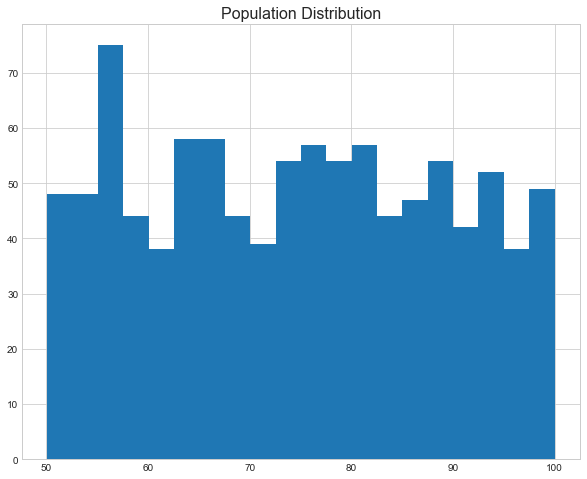

In [51]:

# view the population distribution
fig = plt.hist(pop, bins=20)
# Add a title 
plt.title("Population Distribution", fontsize = 16)
plt.show()
  

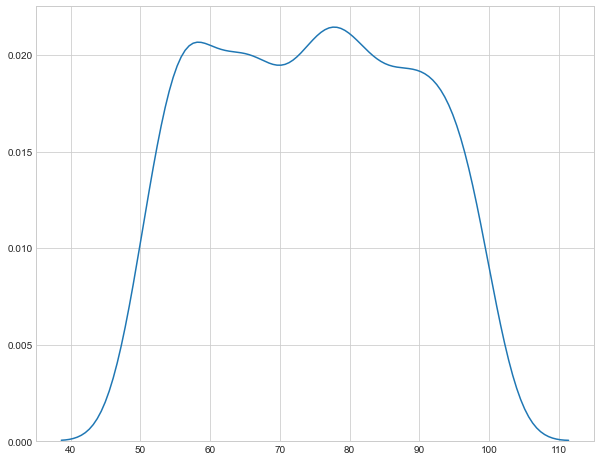

In [52]:

sns.distplot(pop, hist=False)

plt.show()

In [7]:

popstd =np.std(pop)
popmean = np.mean(pop)
print(f"""For the randomly generated normal distribution of size {len(pop)}, the population has a Standard Deviation (SD) of 
{popstd:5.5f} and a mean of {popmean}.""")


For the randomly generated normal distribution of size 1000, the population has a Standard Deviation (SD) of 
14.85745 and a mean of 75.24957441093085.


### Generate a list of samplesizes

In [30]:
# create an array of sample sizes.
samplesizes = [10,25,50,75, 100,150,200,300, 500]
samplesizes

[10, 25, 50, 75, 100, 150, 200, 300, 500]

### Generate samples from the uniform population.

In [33]:
# create an empty array to hold sample results.
sampleresults = []
# //for each samplesize  
for s in samplesizes:
#     create a sample from the population generated above, with sample size s and replace = False.
    sample =  np.random.choice(pop, size=s, replace=False)
#     Append the results to the array sampleresults including pop size, samplesize, sample mean, SDEV P, SDEV S.
    sampleresults.append([popsize, s, np.mean(sample), 
                          np.sqrt(np.sum((sample - np.mean(sample))**2)/len(sample)),
                          np.sqrt(np.sum((sample - np.mean(sample))**2)/(len(sample)-1))
                  ])

###  Insert into a dataframe & Calculate STDP % Difference & STDS % Difference

In [38]:
# data = np.array(list(sampleresults))
df = pd.DataFrame(sampleresults, columns=["POP","SAMPLESIZE","SAMPLEMEAN","STDEVP", "STDEVS"])
df['POPSTD'] = popstd
#  adapted from https://stackoverflow.com/a/48867801
# calculate % difference between popstd and STD
df['STDP%DIFF'] = ((df['STDEVP'] - df['POPSTD']).abs())/df['POPSTD']
df['STDS%DIFF'] = ((df['STDEVS'] - df['POPSTD']).abs())/df['POPSTD']
# dfsorted = df.sort_values(by=['SAMPLESIZE'])
# dfsorted
df

,POP,SAMPLESIZE,SAMPLEMEAN,STDEVP,STDEVS,POPSTD,STDP%DIFF,STDS%DIFF
0,1000,10,75.622607,16.841472,17.752470,14.857454,0.133537,0.194853
1,1000,25,75.502696,14.933630,15.241572,14.857454,0.005127,0.025854
2,1000,50,74.082493,15.662360,15.821373,14.857454,0.054175,0.064878
3,1000,75,76.780677,15.316447,15.419589,14.857454,0.030893,0.037835
4,1000,100,76.284171,14.577436,14.650875,14.857454,0.018847,0.013904
5,1000,150,75.798487,14.339409,14.387447,14.857454,0.034868,0.031634
6,1000,200,73.827498,15.208243,15.246406,14.857454,0.023610,0.026179
7,1000,300,75.707436,15.195289,15.220678,14.857454,0.022738,0.024447
8,1000,500,74.698976,14.417942,14.432381,14.857454,0.029582,0.028610


### Initial Observations 

With a uniformally randomly generated population pop of size {len(pop)}, the population has a Standard Deviation (SD) of 14.857454. At a quick glance, with very small sample sizes of 10 and 15  the percentage difference between the population standard deviation (POPSTD) and the sample standard deviation using n (STDEV.P)is lower than the percentage difference between the population standard deviation  and the sample standard deviation using n-1 (STDEV.S).  However, for the remaining and increasingly larger sample sizes, the results show very marginal differences between the percentage difference between POPSTD and STDEV.S and the percentage difference between POPSTD and STDEV.P.



### Visualizing Initial Results

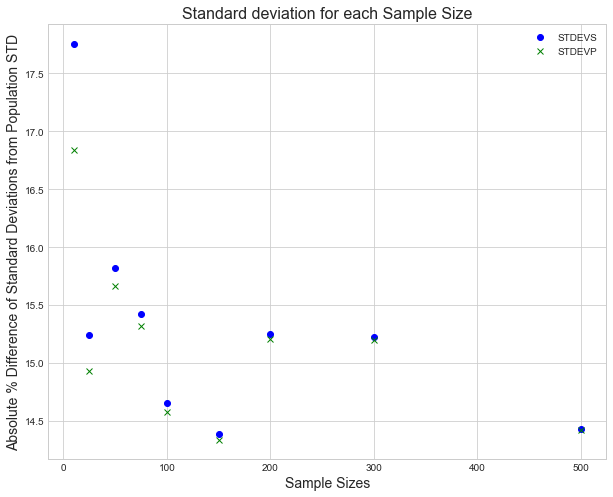

In [56]:
# Ploting  results for standard deviation using STDEV.P & STDEV.P versus pop STD
# samplesize 
plt.plot(df['SAMPLESIZE'], df['STDEVS'], 'bo', label='STDEVS')  
plt.plot(df['SAMPLESIZE'], df['STDEVP'], 'gx', label='STDEVP')  
plt.title('Standard deviation for each Sample Size', fontsize='16')
plt.xlabel('Sample Sizes', fontsize='14')
plt.ylabel('Absolute % Difference of Standard Deviations from Population STD', fontsize='14')
plt.legend()
plt.show()

As noted, the results show in general the percentage variation is similar (excluding very small sizes) but I have two concerns here. In fact the results show that STDEVP is actually closer on more occasions than STDEVS. Firstly the number of times we have tested the data is too limited. Therefore we need to increase the number of samples generated for each samplesize. But before doing so, it would be valuable to address my second concern which is that I am looking at the % absolute difference. Looking at the table of results it does appear that STDEVP tends to be below POPSTD and STDEVS tends to be above. Therefore before moving on to increasing the nubmer of tests, the POPSTD will be visualised against the STDEVP and STDEVS.

In [ ]:
# Ploting  results for standard deviation using STDEV.P & STDEV.P versus pop STD
# samplesize 
plt.plot(df['SAMPLESIZE'], df['STDEVS'], 'bo', label='STDEVS')  
plt.plot(df['SAMPLESIZE'], df['STDEVP'], 'gx', label='STDEVP')  
plt.title('Standard deviation for each Sample Size', fontsize='16')
plt.xlabel('Sample Sizes', fontsize='14')
plt.ylabel('Absolute % Difference of Standard Deviations from Population STD', fontsize='14')
plt.legend()
plt.show()

In [ ]:


 
# print(df["STDPDIFF"].mean())
# print(df["STDSDIFF"].mean())
# # sns.scatterplot(data=df, x="STD", y="MEAN", hue="STDTYPE")
# # plt.plot(popstd,popmean, 'ro')
# # df 
# https://stackoverflow.com/questions/30328646/python-pandas-group-by-in-group-by-and-average
dfmean = dfsorted.groupby(['SAMPLESIZE']).mean()
dfmean

In [ ]:
plt.plot(dfmean.index, dfmean['POPSTD'], color = 'red')
plt.plot(dfmean.index, dfmean['STDN-1'], color='green')
plt.plot(dfmean.index, dfmean['STDN'],color='orange')
plt.xlabel('SAMPLESIZE')
plt.show()

In [ ]:
plt.plot(dfmean.index, dfmean['STDP%DIFF'], color = 'orange')
plt.plot(dfmean.index, dfmean['STDS%DIFF'], color='green')
plt.xlabel('SAMPLESIZE')
plt.show()
print(dfmean['STDP%DIFF'].mean())
print(dfmean['STDS%DIFF'].mean())




### Try varied population sizes.

In [ ]:
variedpopsizes = set(range(1000, 10000, 1000))
print(variedpopsizes)
# s = set(range(50, 500, 25))
samplesizeperc = set(range(10, 60, 10)) 
samplesizeperc

for s in variedpopsizes:
    print(s)

In [ ]:
# define a function to get results for each popsize.
def getstdpop(pops):
    for ssize in samplesizeperc:
    # repeat test for each sample 100 times.
        for i in range(0,10):
            samplesize = (pops//100)*ssize
            sample = np.random.choice(samplesize, pops)
            mylist.append([pops,ssize, 
                np.sqrt(np.sum((sample - np.mean(sample))**2)/len(sample)),
                np.sqrt(np.sum((sample - np.mean(sample))**2)/(len(sample)-1))
                  ])
    return mylist

In [ ]:
mylist = []
for i in variedpopsizes:
    getstdpop(i)


In [ ]:
# data1 = np.array(list(mylist))
df = pd.DataFrame(mylist, columns=["POP","SAMPLESIZE","STDN", "STDN-1"])
df['POPSTD'] = popstd
#  adapted from https://stackoverflow.com/a/48867801

# df['STDP%DIFF'] = (((df['STDN'] - df['POPSTD']).abs())/df['POPSTD'])*100 
# df['STDS%DIFF'] = (((df['STDN-1'] - df['POPSTD']).abs())/df['POPSTD'])*100
# dfsorted = df.sort_values(by=['POP','SAMPLESIZE'])
df
  

In [ ]:
 
# print(df["STDPDIFF"].mean())
# print(df["STDSDIFF"].mean())
# # sns.scatterplot(data=df, x="STD", y="MEAN", hue="STDTYPE")
# # plt.plot(popstd,popmean, 'ro')
# # df 
# https://stackoverflow.com/questions/30328646/python-pandas-group-by-in-group-by-and-average
dfmean = df.groupby(["POP",'SAMPLESIZE'], as_index= False).mean()
dfmean

In [ ]:
dfmean[dfmean.POP == 100]
# sns.lineplot(data= dfmean[dfmean.POP == 100], x="SAMPLESIZE", y="STDS%DIFF")

In [ ]:
[dfmean.POP == 100]
sns.lineplot(data= dfmean[dfmean.POP == 2000], x="SAMPLESIZE", y="STDS%DIFF")
                   

In [ ]:
# biased_data = df.query("STDTYPE == 'Biased'")
# unbiased_data = df.query("STDTYPE == 'Unbiased'")
# sns.lineplot(data=biased_data, x="STD", y="MEAN", color = 'blue')
# sns.lineplot(data=biased_data, x="STD", y="MEAN", color = 'red')


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.random.uniform(0.0, 10.0, 100)
y = np.random.uniform(0.0, 100.0, 100)
z = np.random.normal(100.0, 40.0, 100)
c = np.random.randint(0, 20, 100)

# colour=c, size=c
plt.scatter(x, y, c=c, s=c)

plt.show()

In [ ]:

## References

[1] Wikipedia contributors, “Standard deviation” 2020, [Online; accessed 18-November-2020]. Available: https://en.wikipedia.org/wiki/Standard_deviation

[2] Khan Academy, "Calculating standard deviation step by step", 2020, [Online; accessed 18-November-2020].  Available:https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/variance-standard-deviation-population/a/calculating-standard-deviation-step-by-step

[3] Microsoft Support, 'STDEV.P function', undated,[Online; accessed 18-November-2020]. Available: https://support.microsoft.com/en-us/office/stdev-p-function-6e917c05-31a0-496f-ade7-4f4e7462f285  
[4] Microsoft Support, 'STDEV.S function', undated,[Online; accessed 18-November-2020]. Available:
https://support.microsoft.com/en-us/office/stdev-s-function-7d69cf97-0c1f-4acf-be27-f3e83904cc23